## Assignment - 1 - Story Analysis

## Import Statements

In [387]:
#author : Akshay Tomar (AK357172)
#date : Mar 20, 2017
#task : Assignment 1 - Data Munging Assignment


#import statements - libs
%matplotlib inline
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt

In [388]:
filename = ["Tomato_2014.xml", "Tomato_2015.xml", "Tomato_2016.xml"]

## Function to parse and extract root node from XML

In [389]:
def ret_root(file):
    tree = etree.parse(file)
    root = tree.getroot()
    return root

## Function to return list of headers - Helper function for getdf

In [390]:
def head_temp(file, root):
    list_main = []
    list_headers = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    htemp = []
    for item in list_headers:
        htemp.append(item.values()[0])
    return htemp

## Function to return XML data as a DataFrame

In [391]:
def get_df(root, htemp):
    list_main = []
    list_values = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    n_tables = (len(list_values))
    n_items = len(list_values[0].getchildren())
    for tab in range(n_tables):
        q_temp=[]
        for item in range(n_items):
            q_temp.append(list_values[tab].getchildren()[item].text)
        list_main.append(q_temp)
    df = pd.DataFrame(data=list_main, columns=htemp)
    return df

## Function to return combined DataFrame for all xml files

In [392]:
def get_combined_df(dframe, filename):
    for file in filename:
        root = ret_root(file)
        htemp = head_temp(file, root)
        df_ = get_df(root, htemp)
        dframe = dframe.append(df_, ignore_index=True)
    return dframe

## Helper function for change_dtime

In [393]:
def dec_season(val):
    if ((val > 4) & (val < 8)):
        temp = "Summer"
        return temp
    elif ((val > 7) & (val < 11)):
        temp = "Autumn"
        return temp
    elif ((val>10) | (val<2)):
        temp = "Winter"
        return temp
    else:
        temp = "Spring"
        return temp  

## Function to add Year & Seasons columns to DataFrame

In [402]:
def change_dtime(df):
    A_time = pd.to_datetime(pd.Series(df["Arrival_Date"]), dayfirst = True)
    df['Month'] = A_time.dt.month
    df['Year'] = A_time.dt.year
    df['Season'] = df['Month'].apply(dec_season)
    return df

In [403]:
root = ret_root(filename[0])
htemplst = head_temp(filename[0], root)
df = pd.DataFrame(columns=htemplst)

## Getting combined DataFrame for 3 years

In [404]:
df = get_combined_df(df, filename)

In [405]:
df.is_copy = False

In [406]:
df['Min_x0020_Price'] = df['Min_x0020_Price'].astype(float)
df['Max_x0020_Price'] = df['Max_x0020_Price'].astype(float)
df['Modal_x0020_Price'] = df['Modal_x0020_Price'].astype(float)

In [408]:
df = change_dtime(df)

## Creating new DataFrame with specified columns

In [558]:
df_new = pd.DataFrame(data=df, columns=['State', 'District', 'Variety', 'Modal_x0020_Price', 'Season'])

In [575]:
df_new_sorted = df_new.sort_values(by='Modal_x0020_Price', ascending=False)

## Conclusion - 1 - Farmer's POV - Which Variety to plant ?

## Taking mean price for different tomato varieties

In [576]:
df_new_sorted = df_new_sorted.groupby(['State', 'Season', 'Variety']).mean()

In [577]:
df_new_sorted.reset_index(inplace=True)

## Finding out the best Variety to plant, according to the mean of their prices

In [579]:
df_new_sorted = df_new_sorted.sort_values(by='Modal_x0020_Price', ascending=False)

In [580]:
df_new_sorted.reset_index(inplace=True)

In [581]:
df_new_sorted = df_new_sorted.groupby(['State', 'Season']).first()

In [582]:
df_new_sorted.reset_index(inplace=True)

## Output of conclusion - 1

In [584]:
df_new_sorted_pivoted = df_new_sorted.pivot(index = 'State', columns = 'Season', values = 'Variety')

In [586]:
df_new_sorted_pivoted

Season,Autumn,Spring,Summer,Winter
State,,,,
Andaman and Nicobar,Other,Other,Other,Other
Andhra Pradesh,Deshi,Deshi,Deshi,Tomato
Assam,Other,Deshi,Tomato,Tomato
Bihar,Other,Other,Other,Other
Chandigarh,Other,Other,Other,Other
Chattisgarh,Other,Other,Other,Local
Gujarat,Other,Tomato,Tomato,Tomato
Haryana,Sankar,Hybrid,Other,Other
Himachal Pradesh,Local,Other,Local,Tomato


## Conclusion - 2 - How much profits/SP can you get using conclusion 1 ?

In [587]:
val = df_new_sorted.groupby(['State', 'Season'])["Modal_x0020_Price"].mean().unstack()

In [588]:
val.head()

Season,Autumn,Spring,Summer,Winter
State,,,,
Andaman and Nicobar,8459.677419,5578.571429,9300.000000,7939.024390
Andhra Pradesh,1843.485393,1155.759312,2823.989899,1950.215569
Assam,3406.081081,2400.000000,2407.299270,2107.841410
Bihar,5362.500000,5500.000000,5250.000000,4097.647059
Chandigarh,1255.925926,842.109375,1279.607843,1211.269841


Plotting graph for Conclusion - 2

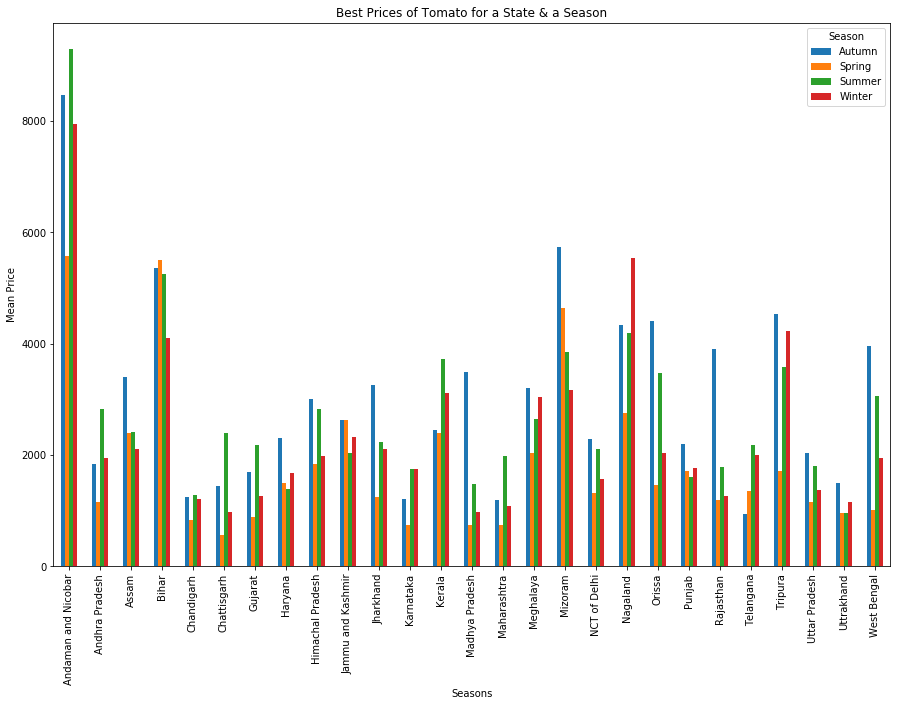

In [589]:
ax = val.plot(kind = 'bar', 
              stacked = False, 
              figsize = (15.0, 10.0), 
              title=("Best Prices of Tomato for a State & a Season"))
ax.set_xlabel("Seasons")
ax.set_ylabel("Mean Price")

## Some extra analysis

In [593]:
val2 = df_new_sorted.groupby(['Season', 'Variety'])["Modal_x0020_Price"].mean().unstack()

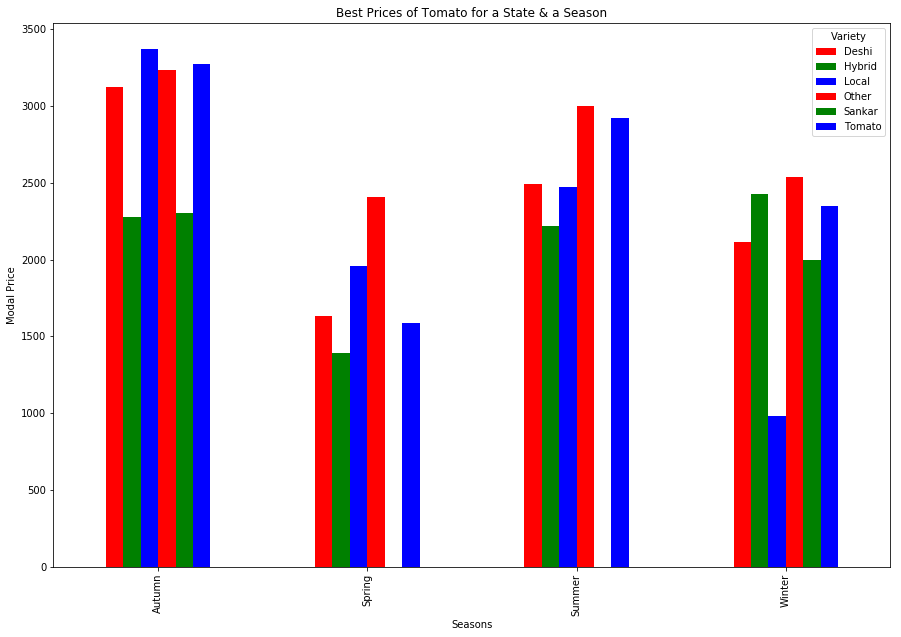

In [595]:
ax2 = val2.plot(kind='bar', 
              stacked=False, 
              figsize=(15.0, 10.0), 
              title=("Best Prices of Tomato for a State & a Season"),
              legend=True,
              color=['r','g','b'])
ax2.set_xlabel("Seasons")
ax2.set_ylabel("Modal Price")